# Visualization Warmup

1. Copy the following code into a jupyter notebook named `visualization_warmup.ipynb`

```python
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    url = 'https://gist.githubusercontent.com/zgulde/018f5d601efc79cb741a7aba92f51d29/raw/c08f1c09f605b43e9a354890f9dd68f296e76dc4/students.csv'
    df = pd.read_csv(url)
    ```

1. `df` contains (fake) data on students time at codeup:

    - `ml_coffee`: coffee consumption in milliliters
    - `syntax_errors`: number of syntax errors
    - `p_days_absent`: percentage of days absent
    
1. Create a scatter plot of `syntax_errors` and `ml_coffee`. Make sure to give your visual an appropriate title and labels.

1. Create a scatter plot of `p_days_absent` and `ml_coffee`. Make sure to give your visual an appropriate title and labels.

1. Perform any other customizations you think will help to the plots you have created

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

url = 'https://gist.githubusercontent.com/zgulde/018f5d601efc79cb741a7aba92f51d29/raw/c08f1c09f605b43e9a354890f9dd68f296e76dc4/students.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,ml_coffee,syntax_errors,p_days_absent
0,16225,5.071306e+10,0.038821
1,18230,5.199823e+10,0.022748
2,15877,5.072630e+10,0.036627
3,8263,4.907919e+10,0.041293
4,13935,5.145114e+10,0.081544


In [15]:
# plt.rc sets defaults for matplotlib figures
plt.rc('font', size=13)
plt.rc('figure', figsize=(13, 5))

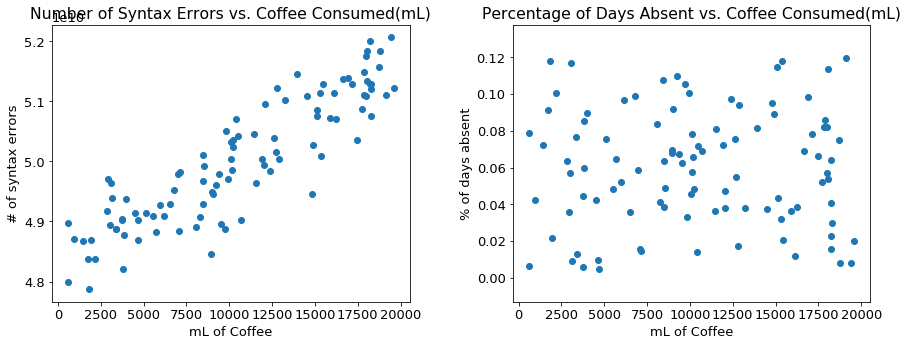

In [20]:
plt.subplot(121)
plt.scatter(x='ml_coffee', y='syntax_errors', data=df)
plt.title('Number of Syntax Errors vs. Coffee Consumed(mL)')
plt.xlabel('mL of Coffee')
plt.ylabel('# of syntax errors')

plt.subplot(122)
plt.scatter(x='ml_coffee', y='p_days_absent', data=df)
plt.title('Percentage of Days Absent vs. Coffee Consumed(mL)')
plt.xlabel('mL of Coffee')
plt.ylabel('% of days absent')

plt.tight_layout()